# Assignment 1

Please enter your **name, surname** and **student number** instead of `"NAME-HERE"`, `"SURNAME-HERE"`, `"NUMBER-HERE"` below.

In [58]:
student = {
    'name' : "Eren" ,
    'surname' : "Duralı",
    'studentNumber' : "2361244"
}

print(student)

{'name': 'Eren', 'surname': 'Duralı', 'studentNumber': '2361244'}


## Part I: Classification Problem
1. The ”GYM Members Exercise” dataset should be downloaded from the Kaggle website: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset
2. Use a seed value of 12345 for random number generators to ensure reproducibility in your experiments. [Mandatory, 0 points]
3. Conduct Exploratory Data Analysis (EDA) to gain insights into the dataset
characteristics. Employ statistical summaries and visualizations to un-
cover patterns and anomalies. [10 points]
4. Execute data preprocessing to enhance model performance if deemed nec-
essary. This may include handling missing values, encoding categorical
variables, feature scaling, and any other technique that could improve the
results. [5 points]
5. Implement 5-Fold Cross Validation to assess the robustness of your models.
This approach ensures that the evaluation of your model is as accurate as
possible. [5 points]
6. Develop and evaluate models using K-Nearest Neighbors (KNN), Naive
Bayes, Perceptron, and Logistic Regression algorithms. Document the
performance of each model. [30 points]
7. Investigate the outcomes using appropriate metrics such as accuracy, pre-
cision, recall, F1 score, and ROC-AUC curve where applicable. [5 points]
8. Discuss the results. Reflect on which model yielded the best performance
and hypothesize why this might be the case. Consider the algorithm’s suit-
ability for the data distribution, complexity, and balance of the dataset.
[15 points]


In [59]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")

np.random.seed(12345)

od.download("https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset")

Skipping, found downloaded files in ".\gym-members-exercise-dataset" (use force=True to force download)


In [60]:
df = pd.read_csv("C:/Users/Eren/Desktop/Ders/Machine Learning HW1/Assignment1/gym-members-exercise-dataset/gym_members_exercise_tracking.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [62]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


When we look at the data set we saw that we do not have any missing values. We will need scaling and encoding for ml approaches. We might have an outlier at some columns but better to visualize for identify

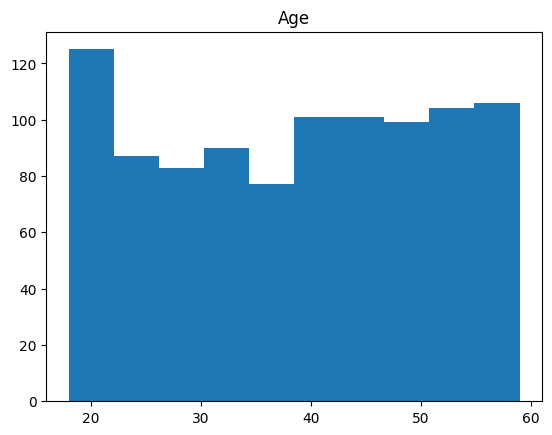

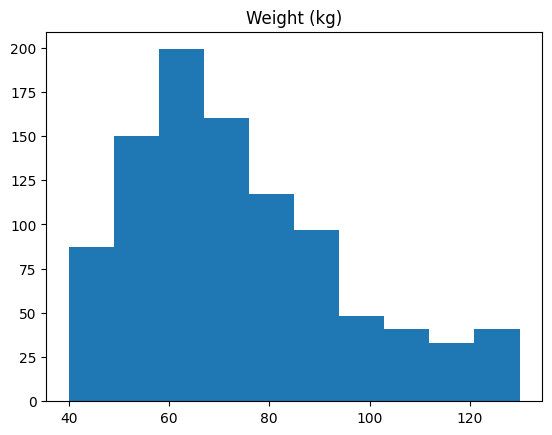

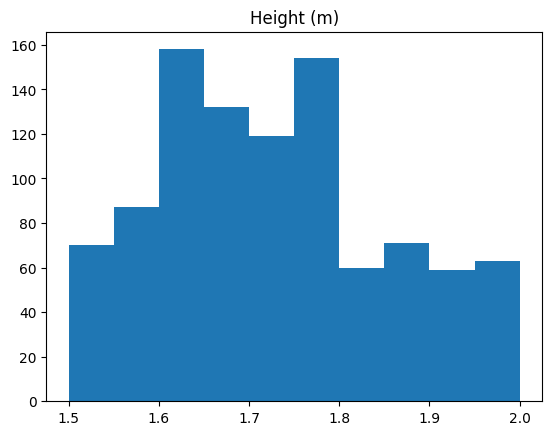

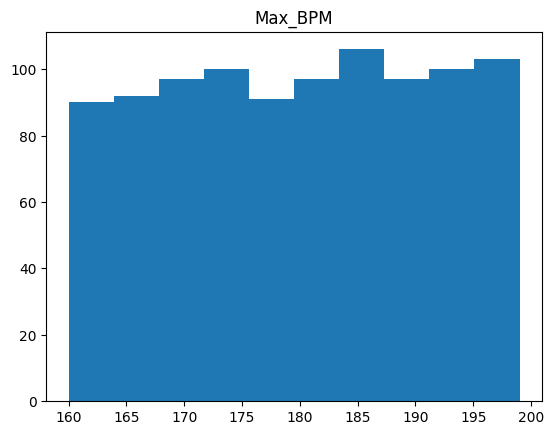

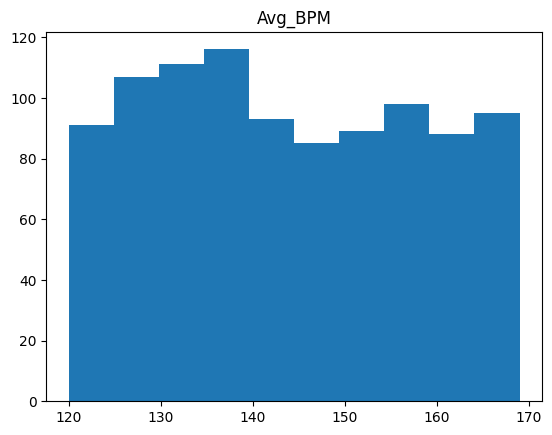

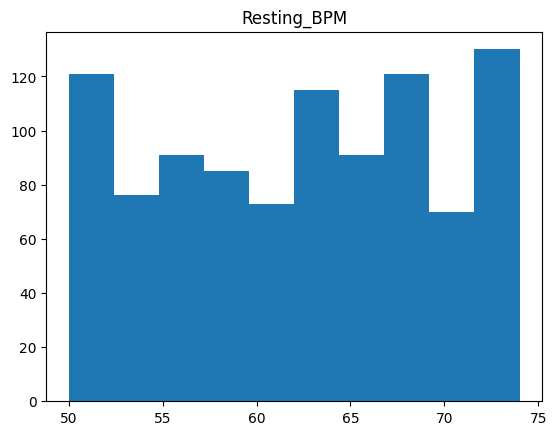

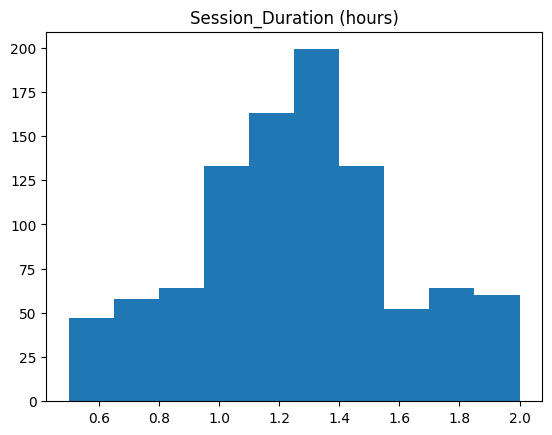

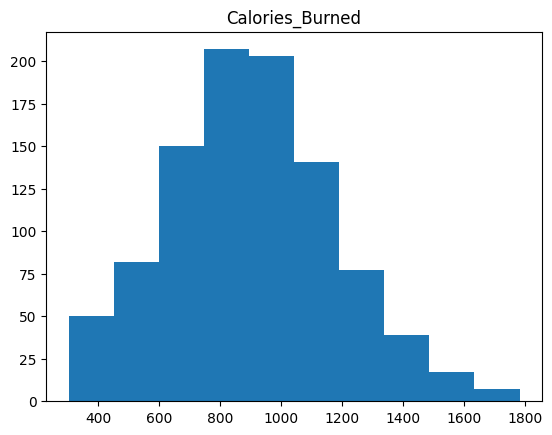

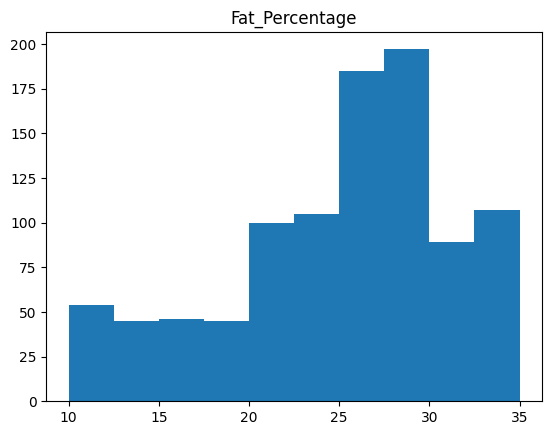

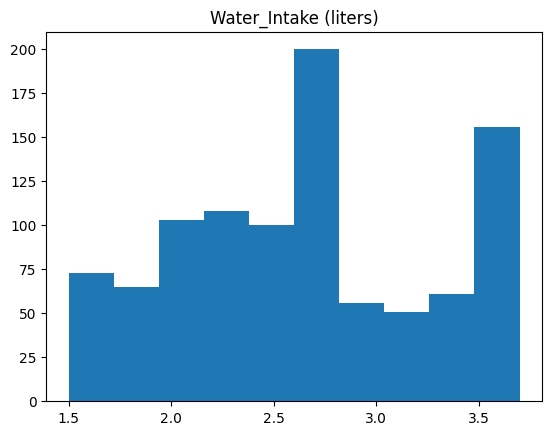

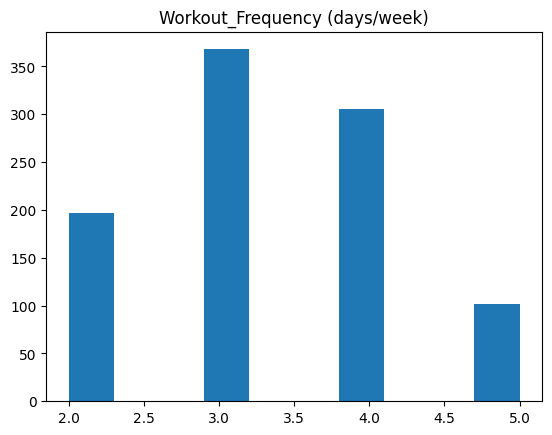

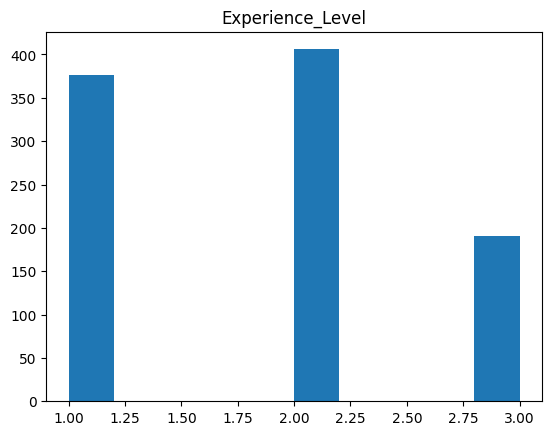

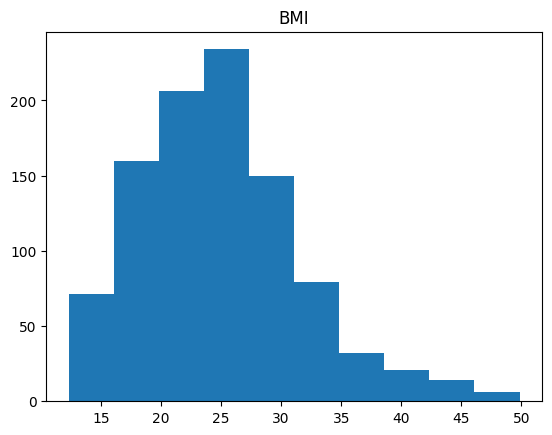

In [63]:
continuous_columns = df.select_dtypes(include=[np.number]).columns
for column in continuous_columns:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

It looks Like we do not have an anomaly (outlier) for this data set for continuous variable we can not wait outlier in categorical variables of course.

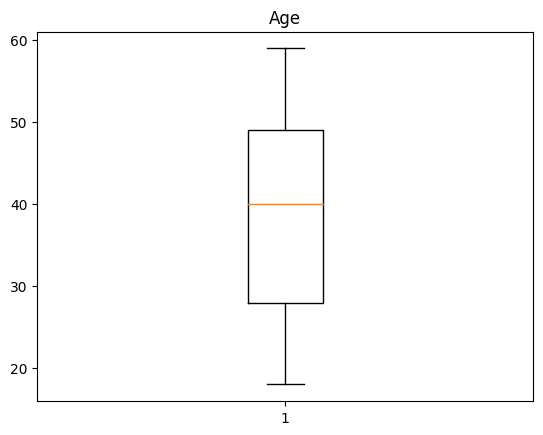

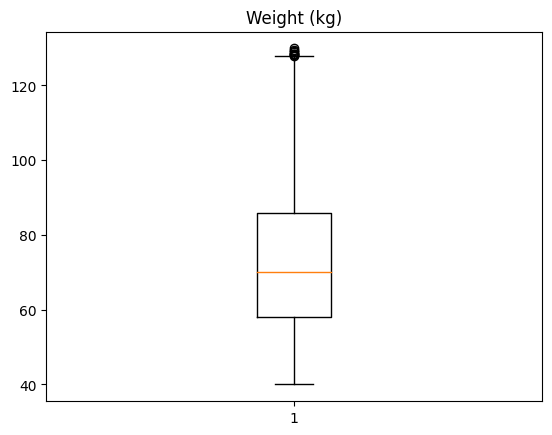

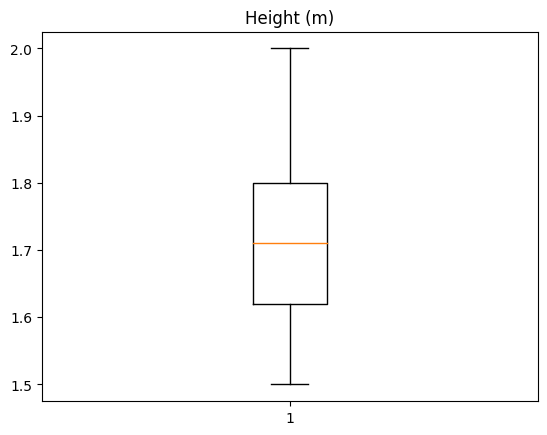

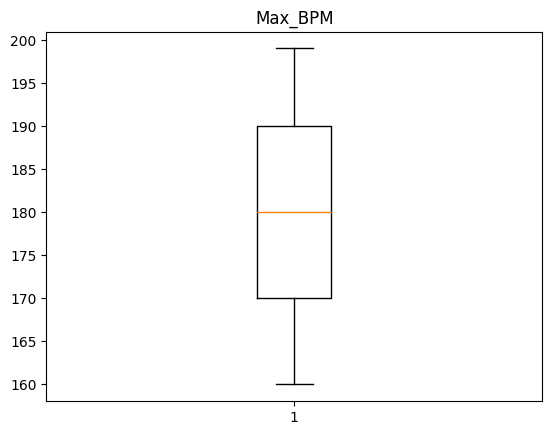

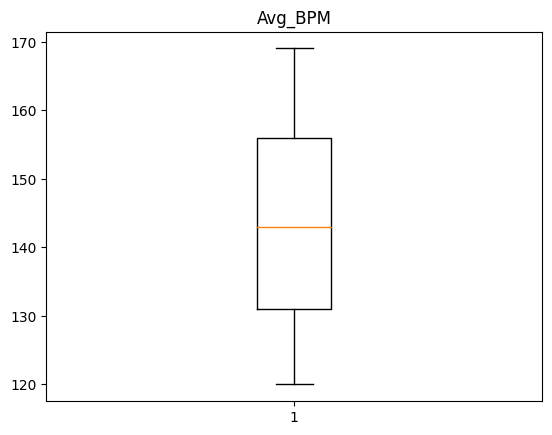

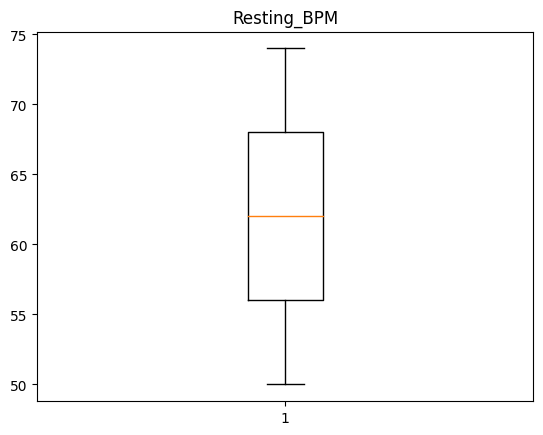

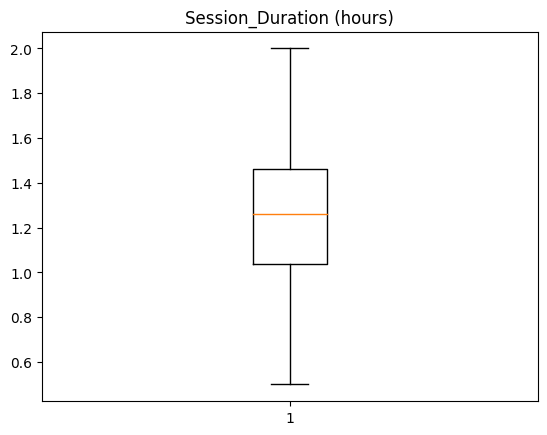

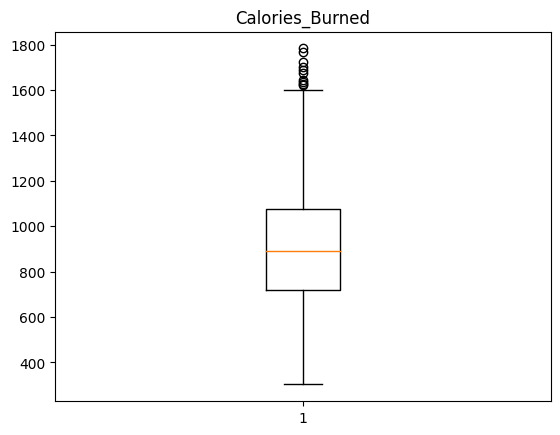

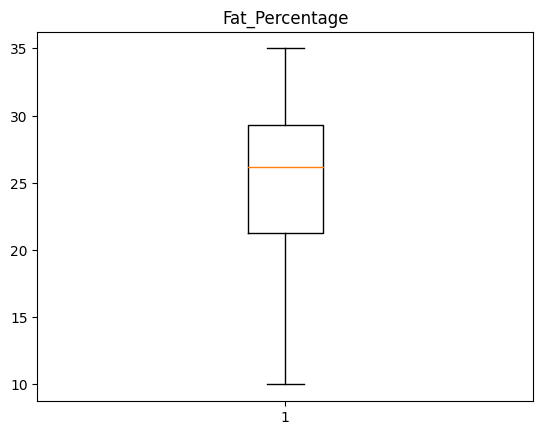

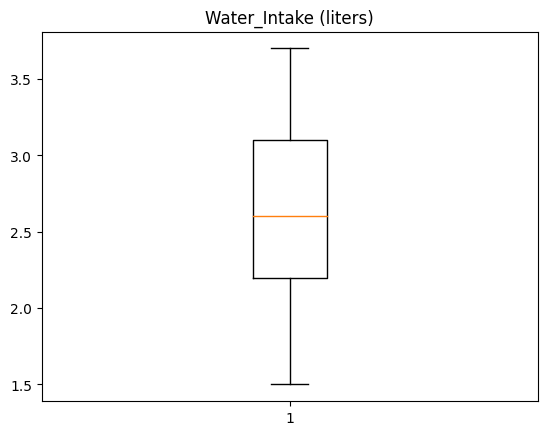

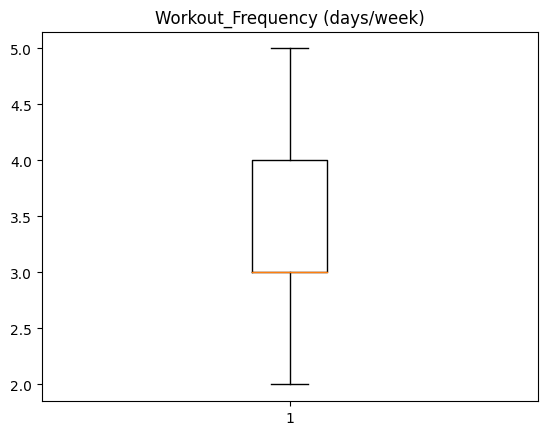

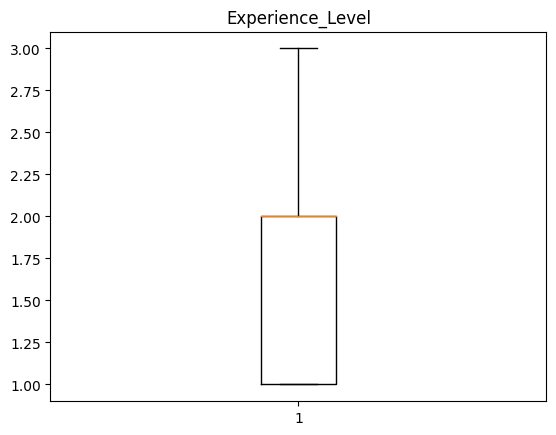

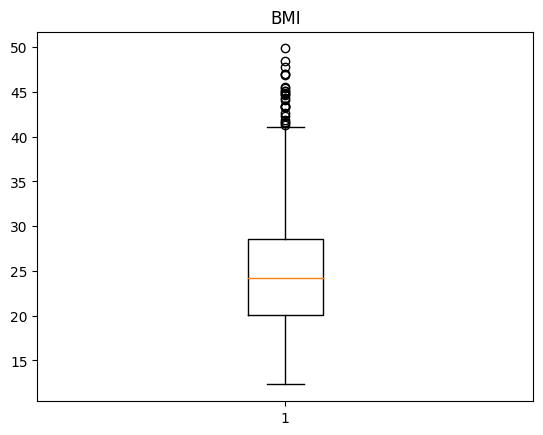

In [64]:
for column in continuous_columns:
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

When we look at the boxplot we might have outliers in BMI, Calories Burned and weight. Lets test them.

In [65]:
def detect_outliers(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return np.abs(z_scores) > threshold

for column in continuous_columns:
    if detect_outliers(df, column).any():
        print(column)


Calories_Burned
BMI


It looks like we have outliers in Calories_Burned and BMI but we will scale this and after scaling may be we can deal with them

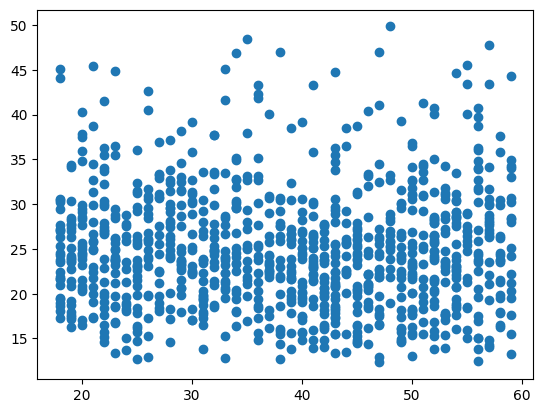

In [66]:
plt.scatter(df["Age"], df["BMI"])

Lets look at the categorical variables right know

In [67]:
category_columns = df.select_dtypes(include=[object]).columns
for column in category_columns:
    print(column, df[column].unique())

Gender ['Male' 'Female']
Workout_Type ['Yoga' 'HIIT' 'Cardio' 'Strength']


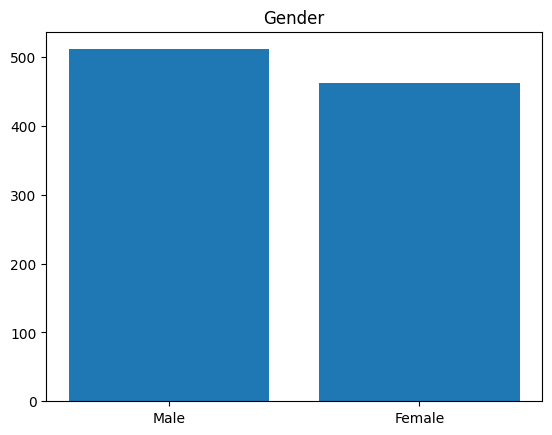

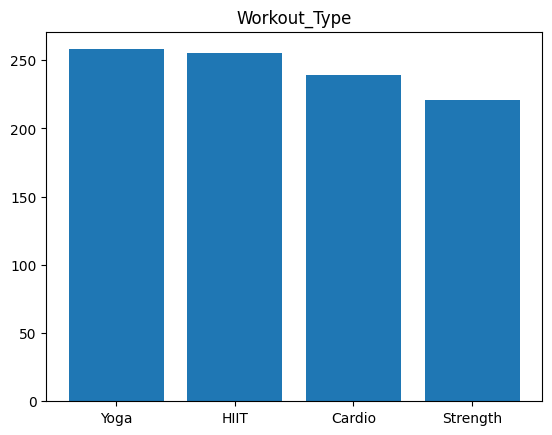

In [68]:
for column in category_columns:
    plt.bar(df[column].unique(), df[column].value_counts())
    plt.title(column)
    plt.show()

Our categorical variables looks balanced which is good. Since we will do binary classification I hope that we will classify for age lets encode the categorical variable first

In [69]:
df_encoded = pd.get_dummies(df,columns = ["Gender", "Workout_Type"], drop_first = True)
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(df[category_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(category_columns))
df_sklearn_encoded = pd.concat([df.drop(category_columns, axis=1), one_hot_df], axis=1)
df_sklearn_encoded.head()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1.0,0.0,0.0,1.0
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0.0,1.0,0.0,0.0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0.0,0.0,0.0,0.0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1.0,0.0,1.0,0.0
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1.0,0.0,1.0,0.0


https://www.geeksforgeeks.org/ml-one-hot-encoding/  I get help from this website when I try to do one hot encoding. Lets look at the correlation of continuous columns.

<Axes: >

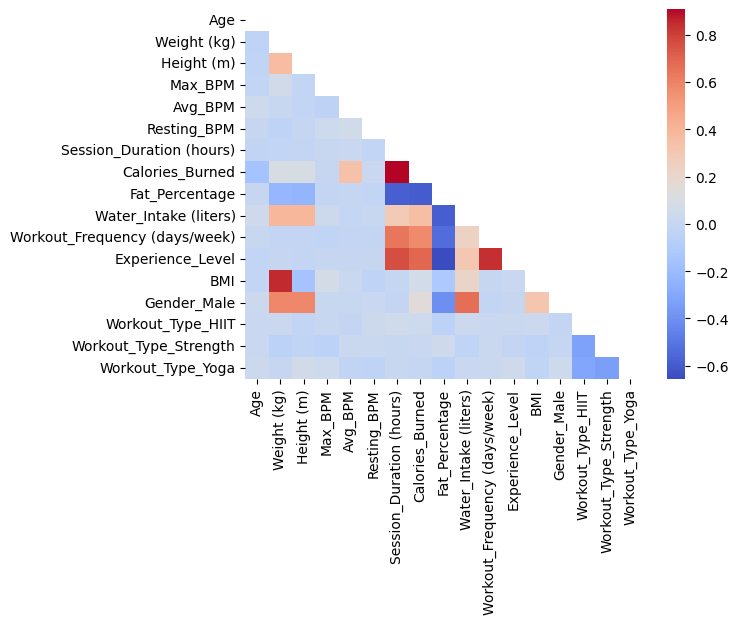

In [70]:
df_continuous = df_sklearn_encoded.select_dtypes(include=[np.number])
matrix = np.triu(df_continuous.corr())
sns.heatmap(df_continuous.corr(), annot=False, cmap='coolwarm', mask=matrix)

As we can see Calories Burned and Session_Duration have high correlation also Experience level and Workout Frequency lastly, BMI and Weight have high correlation these are all excepted but this might be an issue for our model (Multicollinearity). Since we have highly correlated values I decide the use PCA but if I will scale the data for PCA I will split the data first so that test data should not be affect by train data.

In [71]:
Y = df_sklearn_encoded.loc[:, "Gender_Male"]
X = df_sklearn_encoded.loc[:, df_sklearn_encoded.columns != "Gender_Male"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
# Scaling
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [73]:
# Principal Component Analysis
pca = PCA(.95)
pca.fit(X_train_scaled)

PCA(n_components=0.95)

In [74]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

We use PCA But Of Course we will try both and decide which one is better.

In [75]:
# Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# K-Nearest Neighbors

Accuracy for k=1 is 0.8615384615384616
Accuracy for k=3 is 0.8871794871794871
Accuracy for k=5 is 0.9076923076923077
Accuracy for k=7 is 0.9128205128205128
Accuracy for k=9 is 0.9179487179487179
Accuracy for k=11 is 0.9384615384615385
Accuracy for k=13 is 0.9333333333333333
Accuracy for k=15 is 0.9282051282051282


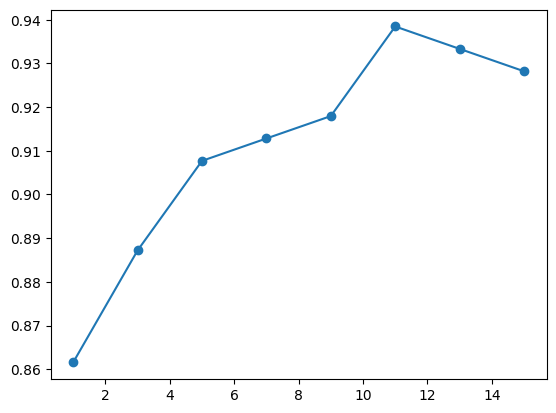

In [76]:

seq_k = np.arange(1, 17, 2)
Accuracies = {}
for i, k in enumerate(seq_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn.fit(X_train_scaled, Y_train)
    y_pred = knn_model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy for k={k} is {accuracy}")
    Accuracies[k] = accuracy
plt.plot(list(Accuracies.keys()), list(Accuracies.values()), marker='o')

    

13 has the best accuracy but first I want to try the pca datas 

## K-Nearest Neighbors NCA

Accuracy for k=1 is 0.9282051282051282
Accuracy for k=3 is 0.9538461538461539
Accuracy for k=5 is 0.9435897435897436
Accuracy for k=7 is 0.9435897435897436
Accuracy for k=9 is 0.9435897435897436
Accuracy for k=11 is 0.9435897435897436
Accuracy for k=13 is 0.9487179487179487
Accuracy for k=15 is 0.9435897435897436


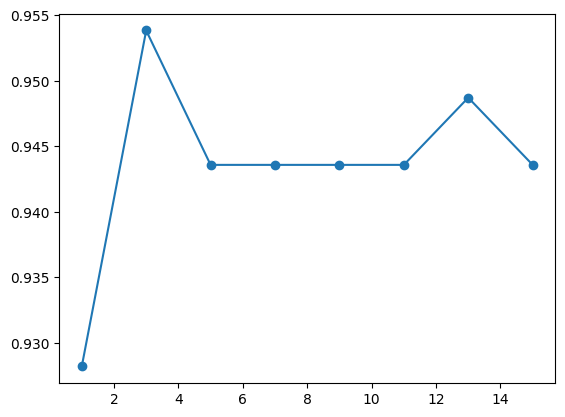

In [77]:
#K-Nearest Neighbors NCA
seq_k = np.arange(1, 17, 2)
Accuracies_nca = {}
for i, k in enumerate(seq_k):
    nca = NeighborhoodComponentsAnalysis(random_state=42)
    knn = KNeighborsClassifier(n_neighbors=k)
    nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
    knn_nca = nca_pipe.fit(X_train_scaled, Y_train)
    y_pred = knn_nca.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy for k={k} is {accuracy}")
    Accuracies_nca[k] = accuracy
plt.plot(list(Accuracies_nca.keys()), list(Accuracies_nca.values()), marker='o')

In scikit learn library ("https://scikit-learn.org/1.5/modules/neighbors.html") I found NCA method and I tried that works really well so I decided to use this as a final model so lets do the cross validation for k = 3 and then finish with knn.

In [78]:
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
knn_nca_l = nca_pipe.fit(X_train_scaled, Y_train)
y_pred_knn = knn_nca_l.predict(X_test_scaled)
scores = cross_val_score(knn_nca_l, X_train_scaled, Y_train, cv=kf)
print(f"Mean of Cross-Validation: {scores.mean()}")

Mean of Cross-Validation: 0.9408767576509511


KNN gives 94% accuracy.

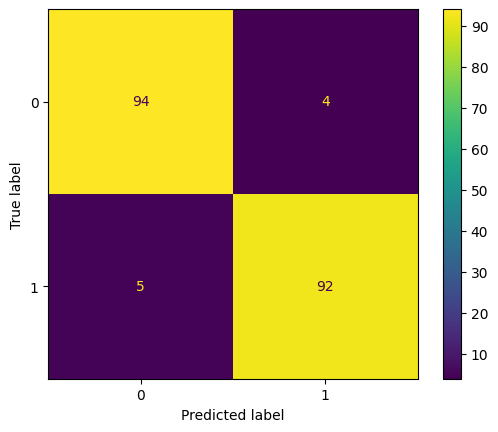

In [79]:
knn_cm = confusion_matrix(Y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = knn_cm)
disp.plot()

In [80]:
knn_metric = metrics.classification_report(Y_test, y_pred_knn)
print(knn_metric)

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95        98
         1.0       0.96      0.95      0.95        97

    accuracy                           0.95       195
   macro avg       0.95      0.95      0.95       195
weighted avg       0.95      0.95      0.95       195



It is one way too show but I think this is a little bit complex so I will make a dictionary.

In [81]:
knn_metrics = {"Accuracy": metrics.accuracy_score(Y_test, y_pred_knn), "Precision": metrics.precision_score(Y_test, y_pred_knn), "Recall": metrics.recall_score(Y_test, y_pred_knn), "F1-score": metrics.f1_score(Y_test, y_pred_knn)}
print(knn_metrics)

{'Accuracy': 0.9538461538461539, 'Precision': 0.9583333333333334, 'Recall': 0.9484536082474226, 'F1-score': 0.9533678756476685}


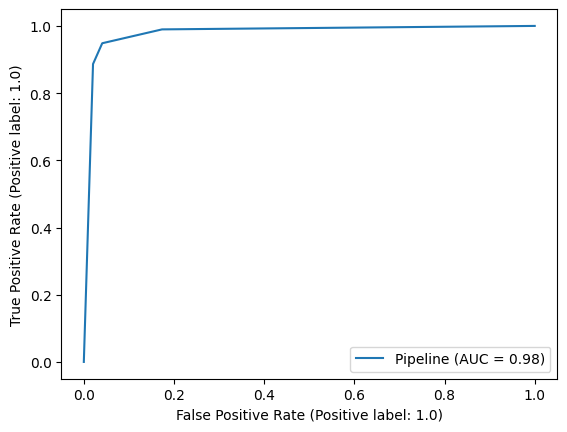

In [82]:
RocCurveDisplay.from_estimator(knn_nca_l, X_test_scaled, Y_test)

In [83]:
knn_train = knn_nca_l.predict(X_train_scaled)
metrics.accuracy_score(Y_train, knn_train)

0.9910025706940874

We have a balanced dataset so I think that our primary matric should be Accuracy metric. Knn has 0.95 Accuracy that means model correctly classified 95% of data. Also, the other metrics such as Precision (How truly model classified as man) 96%, Recall (How much of the true man correctly classified by model) 95%, F1-score (metric that using precision and recall) 95% these are very great result. Also these results show that we do not have overfit or underfit. 

# Naive Bayes

In [84]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
scores_nb = cross_val_score(nb_model, X_train_scaled, Y_train, cv=kf)
print(f"Mean of Cross-Validation: {scores_nb.mean()}")

Mean of Cross-Validation: 0.8958643507030605


We are less accurate in Naive Bayes model than knn. Our accuracy result is 0.89 it is a good accuracy actually but still knn is more preferable.

In [85]:
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
print(f"Accuracy: {accuracy_nb}")

Accuracy: 0.8974358974358975


In [86]:
nb_metric = metrics.classification_report(Y_test, y_pred_nb)
print(nb_metric)

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        98
         1.0       0.94      0.85      0.89        97

    accuracy                           0.90       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.90      0.90      0.90       195



Our precision score is a little bit less for females and our recall is a little bit less for males.

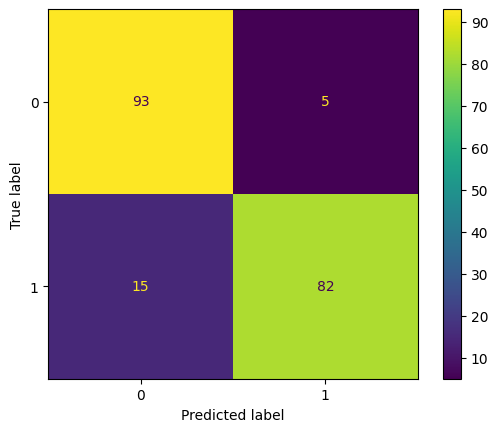

In [87]:
nb_cm = confusion_matrix(Y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm)
disp.plot()

We have 93:TN 82:TP 5:FP and 15:FN. I think our false negative rate a little bit high.

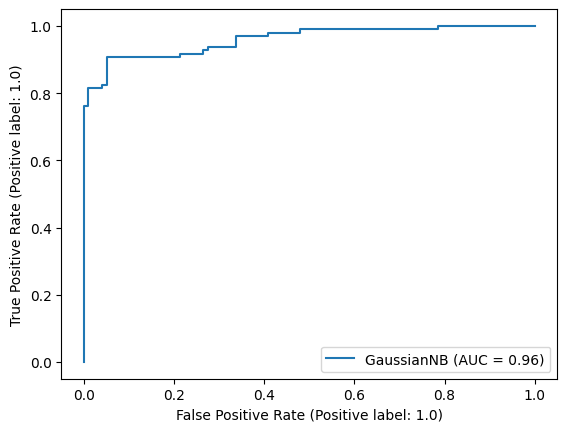

In [88]:
RocCurveDisplay.from_estimator(nb_model, X_test_scaled, Y_test)

Auc = 0.96 And Curve is decreasing a little bit before coming the left side. So worse than knn.

In [89]:

param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)
optimized_nb_model = grid_search.best_estimator_
y_pred_optimized_nb = optimized_nb_model.predict(X_test_scaled)
accuracy_optimized_nb = accuracy_score(Y_test, y_pred_optimized_nb)
print(f"Optimized Naive Bayes accuracy: {accuracy_optimized_nb}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimized Naive Bayes accuracy: 0.8974358974358975


Since optimizing did not make any improvement I will not explain the next steps.

# Perceptron

In [90]:
perceptron = Perceptron(random_state=42)
param_grid_pt = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [1000, 2000, 3000, 4000, 5000],
    'eta0': [0.01, 0.1, 1.0, 10.0]
}
grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid_pt, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)
optimized_perceptron = grid_search.best_estimator_
y_pred_perceptron = optimized_perceptron.predict(X_test_scaled)
accuracy_perceptron = accuracy_score(Y_test, y_pred_perceptron)
print(f"Optimized Perceptron accuracy: {accuracy_perceptron}")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Optimized Perceptron accuracy: 0.958974358974359


Directly optimize the perceptron we use regularization techniques too and alpha as a constant for regularization term, max iter try to execute if not converge, eta0 is the learning rate

In [91]:
perceptron_metric = metrics.classification_report(Y_test, y_pred_perceptron)
print(perceptron_metric)

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        98
         1.0       0.96      0.96      0.96        97

    accuracy                           0.96       195
   macro avg       0.96      0.96      0.96       195
weighted avg       0.96      0.96      0.96       195



We have 0.96 accuracy and all other values so perceptron is the best right now.

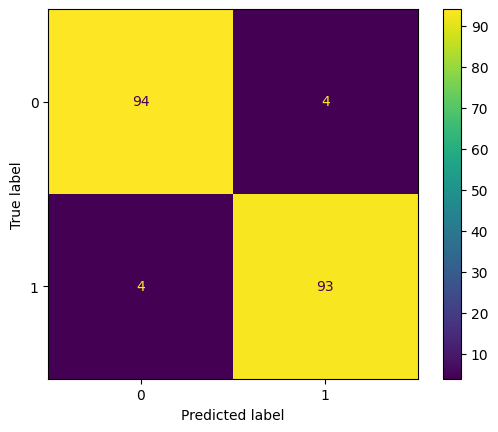

In [92]:
perceptron_cm = confusion_matrix(Y_test, y_pred_perceptron)
disp = ConfusionMatrixDisplay(confusion_matrix=perceptron_cm)
disp.plot()

We have TN:94, TP:93, FP:4 and FN:4 which is amazing guess. Our model might be linearly seperable (train) But I did not check.

In [93]:
y_pred_perceptron_tr = optimized_perceptron.predict(X_train_scaled)
accuracy_perceptron_tr = accuracy_score(Y_train, y_pred_perceptron_tr)
print(f"Optimized Perceptron accuracy: {accuracy_perceptron_tr}")

Optimized Perceptron accuracy: 0.9331619537275064


Maybe it is not. Since Accuracy 0.93

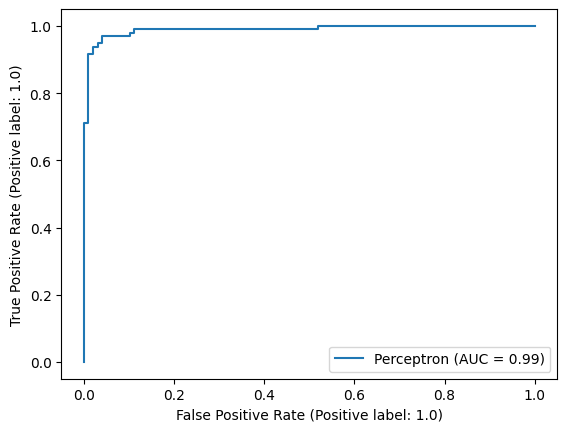

In [94]:
RocCurveDisplay.from_estimator(optimized_perceptron, X_test_scaled, Y_test)

Auc 0.99 And ROC Curve looks very good.

# Logistic Regression

In [95]:
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
log_reg = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, verbose=1, n_jobs=-1)
grid_search_lr.fit(X_train_scaled, Y_train)
optimized_log_reg = grid_search_lr.best_estimator_
y_pred_log_reg = optimized_log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(Y_test, y_pred_log_reg)
print(f"Optimized Logistic Regression accuracy: {accuracy_log_reg}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Optimized Logistic Regression accuracy: 0.9743589743589743


97.4% Accuracy and since this is our last model, it is the best model for our problem. Again we use grid search for hyper-parameter tuning. Penalty: regularization, C: Inverse of regularization strength (smaller stronger regularization), solver: algorithm to use in the optimization problem, max_iter: Max iteration number. (Scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [96]:
log_reg_metric = metrics.classification_report(Y_test, y_pred_log_reg)
print(log_reg_metric)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97        98
         1.0       0.97      0.98      0.97        97

    accuracy                           0.97       195
   macro avg       0.97      0.97      0.97       195
weighted avg       0.97      0.97      0.97       195



Accuracy and all the other metrics above the 0.97 so this is nearly perfect score and it is not overfit since it is our test data.

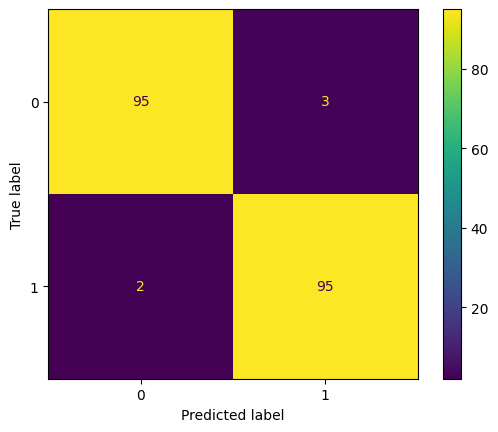

In [97]:
log_reg_cm = confusion_matrix(Y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_cm)
disp.plot()

TN:95, TP:95, FP:3 and FN:2. This means that we just have 5 misclassification.

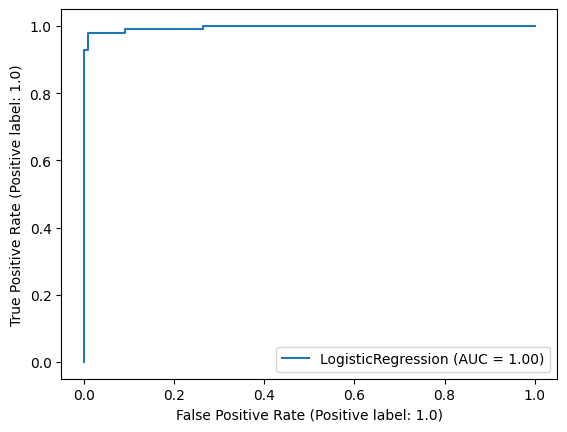

In [98]:
RocCurveDisplay.from_estimator(optimized_log_reg, X_test_scaled, Y_test)

AUC is 1 (best possible score) and Roc Curve looks like nearly parallel to TPR and FPR it is good. So For these reasons because have the highest accuracy, f1-score, and AUC and other metrics logistic regression is the best. After that respectively, Perceptron, KNN, Naive Bayes. 

## Part II: Gradient Descent Implementation
1. The ”Happiness Index” dataset should be downloaded from the Kaggle website: https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019?select=report_2018-2019.csv
2. Implement the gradient descent algorithm without using of any libraries
except for Pandas and NumPy. [10 points]
3. How many iteration step needs to converge with learning rate [0.01, 0.1,
1]? Devise an intelligent strategy for choosing the learning rate to reduce
the number of iterations required for convergence. Show how the learning
rate that you propose impacts the convergence of the gradient descent
algorithm. Show on the graph how the cost function changes with the
number of iterations and how the gradient descent converges. [20 points]


In [99]:
od.download("https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019?select=report_2018-2019.csv")

Skipping, found downloaded files in ".\happiness-index-2018-2019" (use force=True to force download)


In [100]:
data = pd.read_csv("C:/Users/Eren/Desktop/Ders/Machine Learning HW1/Assignment1/happiness-index-2018-2019/report_2018-2019.csv")
data.head()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Year                          312 non-null    int64  
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       312 non-null    float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [102]:
Y = data["Score"]
X = data.drop(columns=["Score"])
X = X.drop(columns=["Country or region"])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

We split the data first I will use linear regression. We will scale this but we have country or region but I do not think it is really matter at linear regression also I can not encode that without increasing dimensionality too much so I will just drop that column

In [103]:
# Scaling
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

We have 3 gradient descent algorithm Batch, Stochastic, Mini Batch. I do not want to do all of them so I want to do the batch if it is possible.

In [104]:

def gradient_descent(X, y, y_pd, bias, weights, learning_rate):
    der_bias = (np.sum(y_pd - y)*2)/len(y)
    der_weights = (np.dot((y_pd - y),X)*2)/len(y)
    bias_n = bias - learning_rate*der_bias
    weights_n = weights - learning_rate*der_weights
    return bias_n, weights_n

This is our gradient descent for linear regression function.

In [105]:
def predict(X, bias, weights):
    return np.dot(X, weights) + bias
y_pd = predict(X_train_scaled, 0, np.zeros(X_train_scaled.shape[1]))
y_pd[0:8]

array([0., 0., 0., 0., 0., 0., 0., 0.])

We just write a linear regression function predict and gives our weights and bias 0

In [106]:
def cost_function(y, y_pd):
    residuals = y - y_pd
    return np.sum(np.dot(residuals.transpose(), residuals))/len(y - residuals)
cost_function(Y_train, y_pd)

30.247650309236953

This is our cost function with weights and bias 0

In [107]:
bias, weights = gradient_descent(X_train_scaled, Y_train, y_pd, 0, np.zeros(X_train_scaled.shape[1]), 0.01)

In [108]:
y_pd = predict(X_train_scaled, bias, weights)
y_pd[0:8]

array([0.18558046, 0.16339885, 0.16607802, 0.0014688 , 0.14347923,
       0.24233988, 0.14244249, 0.18412834])

Weights change so it is working but how can we find the best learning rate. We need a new function

In [120]:
def gradient_descent_opt(X, y, learning_rate, num_iter, bias = 0, weights = np.zeros(X.shape[1])):
    cur_cost = float("inf")
    cost_histories = pd.DataFrame(columns=["iterations", "cost"])
    iter = 0
    r_index = 0
    print("Initial Cost: ", cost_function(y, predict(X, bias, weights)))
    for i in range(num_iter):
        y_pd = predict(X, bias, weights)
        bias, weights = gradient_descent(X, y, y_pd, bias, weights, learning_rate)
        if cur_cost <= cost_function(y, y_pd):
            print(cur_cost)
            break
        cur_cost = cost_function(y, y_pd)
        if i % (num_iter-1) == 0:
            print(f"Iteration: {i}, Cost: {cur_cost}")
        if i % 100 == 0:
            cost_histories.loc[r_index] = [iter, cur_cost]
            r_index += 1
            iter += 100
    return bias, weights, cost_histories
    

This is a function which starts from 0 for bias and weight and It will loop for when the last loss function bigger than current loss function or it goes till number of iteration.

In [121]:
gradient_descent_opt(X_train_scaled, Y_train, 0.1, 1000)


Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
0.021824580812751508


(5.381875502008031,
 array([-1.05985391,  0.01779554,  0.00980951,  0.05048926, -0.01021023,
         0.01887824,  0.01911505,  0.03673493]),
    iterations       cost
 0         0.0  30.247650
 1       100.0   0.021988
 2       200.0   0.021825
 3       300.0   0.021825
 4       400.0   0.021825
 5       500.0   0.021825)

Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
Iteration: 999, Cost: 0.02200615658075489
Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
0.021824580812751508
Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
30.247650309236953


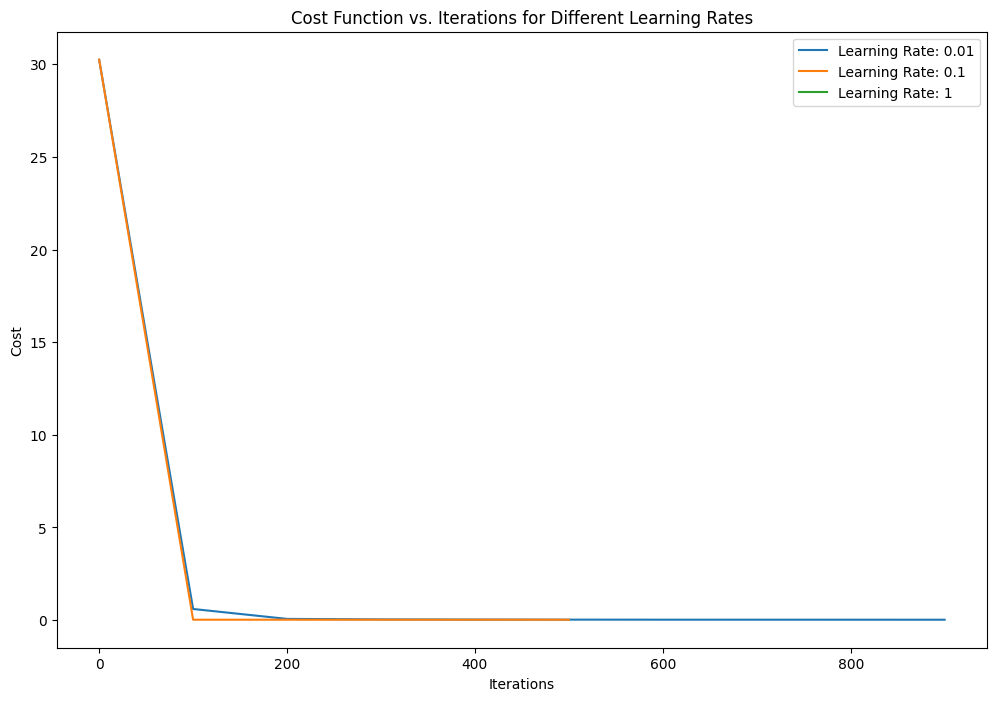

In [122]:
learning_rates = [0.01, 0.1, 1]
num_iter = 1000
cost_histories = {}

for lr in learning_rates:
    _, _, cost_history = gradient_descent_opt(X_train_scaled, Y_train, lr, num_iter)
    cost_histories[lr] = cost_history

plt.figure(figsize=(12, 8))
for lr, cost_history in cost_histories.items():
    plt.plot(cost_history["iterations"], cost_history["cost"], label=f"Learning Rate: {lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.show()

We show the plots looks like 0.1 is a good learning rate for this. 

In [123]:
def find_best_learning_rate(X, y, learning_rates, num_iter):
    best_lr = None
    best_cost = float("inf")
    for lr in learning_rates:
        _, _, cost_history = gradient_descent_opt(X, y, lr, num_iter)
        cur_cost = cost_history["cost"].iloc[-1]
        if cur_cost < best_cost:
            best_cost = cur_cost
            best_lr = lr
    return best_lr, best_cost

I write that function now my strategy will be given some values and I will update that values for every step.

Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
30.247650309236953
Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
0.021824580812751508
Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
Iteration: 999, Cost: 0.02200615658075489
Best Learning Rate: 0.1, Best Cost: 0.021824580812754082
Updated Learning Rates: [0.11, 0.1, 0.09000000000000001]
Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
0.02182458081275121
Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
0.021824580812751508
Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
0.02182458081275131
Best Learning Rate: 0.11, Best Cost: 0.02182458081275121
Updated Learning Rates: [0.12, 0.11, 0.1]
Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
0.02182458081275128
Initial Cost:  30.247650309236953
Iteration: 0, Cost: 30.247650309236953
0.02182458081275121
Initial Cost:  30.24

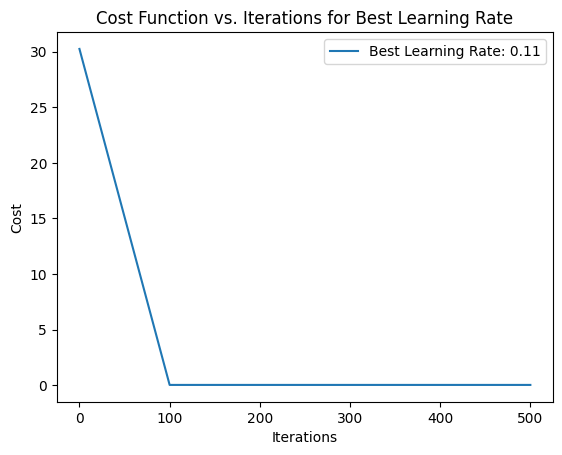

In [124]:
learning_rates = [1, 0.1, 0.01]
try_count = 5
change_rate = 0.01
def update_lr(learning_rates, try_count, change_rate):
    for i in range(try_count):
        best_lr, best_cost = find_best_learning_rate(X_train_scaled, Y_train, learning_rates, 1000)
        print(f"Best Learning Rate: {best_lr}, Best Cost: {best_cost}")
        learning_rates = [best_lr + change_rate, best_lr, best_lr - change_rate]
        print(f"Updated Learning Rates: {learning_rates}")
    return best_lr

best_lr = update_lr(learning_rates, try_count, change_rate)
_, _, cost_history_best_lr = gradient_descent_opt(X_train_scaled, Y_train, best_lr, 1000)

plt.plot(cost_history_best_lr["iterations"], cost_history_best_lr["cost"], label=f"Best Learning Rate: {best_lr}")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Best Learning Rate")
plt.legend()
plt.show()

I think this function will help for this we know that best learning rate around 2. We can at update the change rate as we like.

I have github copilot in my visual studio code I used autofill sometimes.